In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
from sqlalchemy import create_engine
from hold import connection_string

In [3]:
engine = create_engine(f'{connection_string}', encoding='iso-8859-1', connect_args={'connect_timeout': 10})

In [4]:
gtdDF = pd.read_sql_table('global_terrorism', con= engine)

In [5]:
casualties = gtdDF['nkill'] + gtdDF['nwound']
casualties.sum()

554384.0

In [6]:
gtdDF['casualties'] = gtdDF['nkill'] + gtdDF['nwound']
gtdDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1,casualties
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0,7.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0,7.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0,1.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0,16.0


In [45]:
RegionCasualtiesDF = gtdDF[['index1','region_txt','casualties']]
RegionCasualtiesDF = RegionCasualtiesDF.reset_index()
RegionCasualtiesDF

,index,index1,region_txt,casualties
0,0,1.0,Sub-Saharan Africa,7.0
1,1,2.0,Sub-Saharan Africa,7.0
2,2,3.0,South Asia,3.0
3,3,4.0,Eastern Europe,1.0
4,4,5.0,Sub-Saharan Africa,16.0
5,5,7.0,South Asia,0.0
6,6,8.0,Eastern Europe,0.0
7,7,9.0,Middle East & North Africa,0.0
8,8,10.0,Western Europe,1.0
9,9,11.0,Western Europe,0.0


In [46]:
#RegionCasualties2DF = pd.get_dummies(RegionCasualtiesDF['region_txt']).mul(RegionCasualtiesDF['casualties'],0)
RegionCasualties2DF = pd.get_dummies(RegionCasualtiesDF['region_txt']).mul(RegionCasualtiesDF['casualties'],0)
RegionCasualties2DF = RegionCasualties2DF.reset_index()
#RegionCasualties2DF = RegionCasualties2DF.rename(columns = {"index":"index1"})
RegionCasualties2DF

,index,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#RegionCasualtiesMergeDF = pd.concat([RegionCasualtiesDF,RegionCasualties2DF])
RegionCasualtiesMergeDF = result = pd.merge(RegionCasualties2DF,RegionCasualtiesDF[['index','region_txt','casualties']],on='index')
RegionCasualtiesMergeDF = RegionCasualtiesMergeDF.rename(columns={
    'region_txt_Australasia & Oceania':'Australasia & Oceania', 
    'region_txt_Central America & Caribbean': 'Central America & Caribbean',
    'region_txt_Central Asia':'Central Asia',
    'region_txt_East Asia':'East Asia',
    'region_txt_Eastern Europe':'Eastern Europe',
    'region_txt_Middle East & North Africa':'Middle East & North Africa',
    'region_txt_North America':'North America',
    'region_txt_South America':'South America',
    'region_txt_South Asia':'South Asia',
    'region_txt_Southeast Asia':'Southeast Asia',
    'region_txt_Sub-Saharan Africa':'Sub-Saharan Africa',
    'region_txt_Western Europe':'Western Europe'
})
RegionCasualtiesMergeDF

,index,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe,region_txt,casualties
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,Sub-Saharan Africa,7.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,Sub-Saharan Africa,7.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,South Asia,3.0
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Eastern Europe,1.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,Sub-Saharan Africa,16.0
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,South Asia,0.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Eastern Europe,0.0
7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle East & North Africa,0.0
8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Western Europe,1.0
9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Western Europe,0.0


In [52]:
# Assign X (data) and y (target)
data = RegionCasualtiesMergeDF.drop(["index","region_txt",'casualties'], axis=1)
target = RegionCasualtiesMergeDF["region_txt"]
feature_names = data.columns

print(data.shape, target.shape)

(92700, 12) (92700,)


In [53]:
# Split the data into training and testing
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
### END SOLUTION

In [54]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7981877022653722

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7981877022653722

In [56]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.37450260216798376, 'Middle East & North Africa'),
 (0.2522949003541509, 'South Asia'),
 (0.14783095806349997, 'Sub-Saharan Africa'),
 (0.12151156992818789, 'Southeast Asia'),
 (0.05007587673419717, 'Eastern Europe'),
 (0.027231551924563693, 'South America'),
 (0.013663745335261863, 'Western Europe'),
 (0.004328236574713334, 'North America'),
 (0.00381313772938458, 'Central Asia'),
 (0.0030328892757205766, 'East Asia'),
 (0.0014980448599172566, 'Central America & Caribbean'),
 (0.00021648705241891436, 'Australasia & Oceania')]

In [57]:
RFRegionDF = pd.DataFrame(sorted(zip(rf.feature_importances_, feature_names), reverse=True), columns = ['Probability', 'Region'])
RFRegionDF

,Probability,Region
0,0.374503,Middle East & North Africa
1,0.252295,South Asia
2,0.147831,Sub-Saharan Africa
3,0.121512,Southeast Asia
4,0.050076,Eastern Europe
5,0.027232,South America
6,0.013664,Western Europe
7,0.004328,North America
8,0.003813,Central Asia
9,0.003033,East Asia


In [58]:
pies = RFRegionDF['Region'].head(7)
pie_slices = RFRegionDF['Probability'].head(7)
colors = ["lightskyblue","orange","pink","yellowgreen","green","lightcoral","silver"]
          #"lightskyblue"
          #,"lightcoral","lightyellow","silver"]
explode = (0.1,0,0,0,0,0,0)

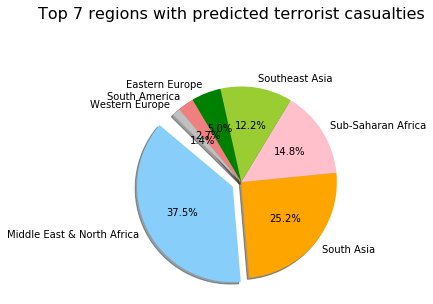

In [59]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_slices, explode=explode, labels=pies, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen

plt.savefig("../GTA/front_end/static/front_end/assets/Pie_Region_Tree_Casualties")
plt.suptitle('Top 7 regions with predicted terrorist casualties', size=16, y=1.12) 
plt.show()